In [1]:
'''Librerías'''
import numpy as np
import matplotlib.pyplot as plt
import pickle # Los modelos antiguos de ML no tienen método save y usan la librearia pickle para poder salvarse y cargarse.

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import random
import pandas as pd
from sklearn.metrics import f1_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/SOMDrive/bacteriaID/

/content/drive/MyDrive/SOMDrive/bacteriaID


In [6]:
'''Datos: Cambiar el acceso a los datos'''
X_fn = './data/X_reference.npy'
y_fn = './data/y_reference.npy'
X = np.load(X_fn)
y = np.load(y_fn)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pca = PCA(n_components=90)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [8]:
clf = SVC()
clf.fit(X_t_train, y_train)
print (clf.score(X_t_test, y_test))

0.9427222222222222


In [9]:
filename = 'SVC_model_saved_11_05_2021.sav'
#Este código sólo para salvar el modelo
#pickle.dump(clf, open(filename, 'wb'))

In [10]:
clf2 = pickle.load(open(filename, 'rb'))

In [11]:
ypred = clf2.predict(X_t_test)

In [12]:
f1_score(y_test, ypred, average='micro')

0.8760555555555556

In [14]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       595
         1.0       1.00      1.00      1.00       596
         2.0       0.67      0.72      0.69       594
         3.0       0.74      0.72      0.73       592
         4.0       0.87      0.86      0.86       616
         5.0       0.99      0.97      0.98       608
         6.0       0.79      0.78      0.79       557
         7.0       0.79      0.85      0.82       610
         8.0       0.69      0.77      0.73       602
         9.0       0.87      0.90      0.88       598
        10.0       0.85      0.68      0.76       541
        11.0       0.79      0.68      0.73       621
        12.0       0.97      0.96      0.97       584
        13.0       0.97      0.99      0.98       622
        14.0       0.94      0.96      0.95       614
        15.0       0.79      0.87      0.83       594
        16.0       0.86      0.77      0.81       630
        17.0       0.93    

In [15]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[595   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 596   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 425  27  10   1   0   0  71  11   0  36   0   0   0   0   0   0
    0   0   0   0  13   0   0   0   0   0   0   0]
 [  0   0  42 428  31   0   0   0  18  38   1  12   1   0   0   0   0   0
    0   3   0   0  17   0   0   0   0   0   0   1]
 [  0   0   2  41 527   0   0   0   6  20   3   3   0   0   0   0   0   0
    0   3   0   0  10   0   0   0   0   0   0   1]
 [  0   0   0   0   0 590  18   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2 436  92   0   0   0   0   0   0   3   0   0   5
    0   0   0   0   0   2   1  16   0   0   0   0]
 [  0   0   0   0   0   0  75 516   1   0   2   0   0   0   0   0   0   6
    0   1   0   0   0   1   0   8   0   0   0   0]


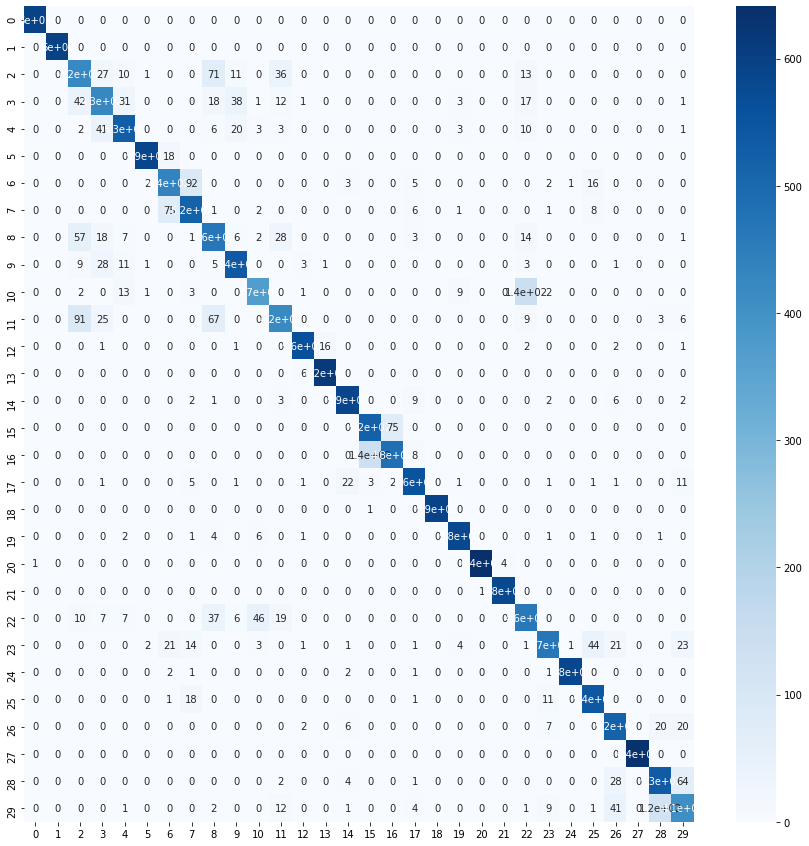

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt2
cf_matrix = confusion_matrix(y_test, ypred)
plt2.figure(figsize=(15,15))
sns.heatmap(cf_matrix, annot=True,cmap='Blues' )
plt2.show()

## Añadimos ruido aleatorio a un intervalo dentro de cada muestra.

El intervalo empezará en una posición aleatoria y diferente para cada muestra.

Se fija el valor del intervalo aunque podría hacerse también variable.

Se calcula la diferencia entre el máximo y 1 y se genera un ruido aleatorio centrado en 0 y desviación típica esa diferencia multiplicada por una variable alpha.


In [22]:
def add_noise (X_n, range_inter,alpha):
       
    for i in range(X_n.shape[0]):
        x_start= random.randint(0, 1000-range_inter)  # punto inicial desde donde vamos a incluir el ruido, cambia para cada muestra
        x_end= x_start + range_inter                  # punto final del ruido.
        
        # para la muestra calculamos la diferencia entre uno y el valor máximo de la muestra en el intervalo
        diff= 1 - max(X_n[i][x_start: x_end].clip(0, 1))
        if (diff == 0): diff = 0.001                  # si el valor máximo en el intervalo es igual a 1, hacemos al menos hay una pequeña diferencia para incluir ruido y que las muestras no sean iguales.
        
        # calculamos ruido 
        noise = np.random.normal(0, diff*alpha,range_inter)
        X_n[i][x_start: x_end] += noise
    
    return X_n

### Ejemplo de visualización de datos con ruido.

In [23]:
range_inter = 150                 # longitud del intervalo. Puede hacerse variable.
alpha = 0.25                      # Porcentaje sobre la diferencia del maximo a 1
X_noise= X_test.copy()

X_noise = add_noise (X_noise, range_inter,alpha)

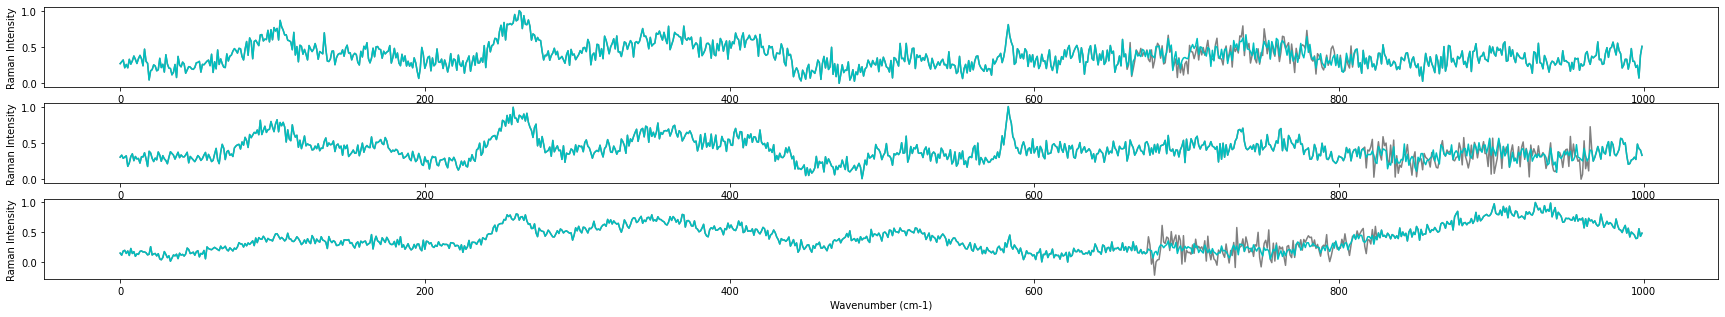

In [30]:
# Mostramos algunos ejemplos de cómo quedarían las muestras tras añadir el ruido
figure =plt.gcf()
figure.set_size_inches(30,5)

v_plot = np.random.randint(0, X_noise.shape[0], 3)

plt.subplot(311)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Raman Intensity')
plt.plot(X_noise[v_plot[0]], color='grey')
plt.plot(X_test[v_plot[0]], color='c')

plt.subplot(312)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Raman Intensity')
plt.plot(X_noise[v_plot[1]], color='grey')
plt.plot(X_test[v_plot[1]], color='c')

plt.subplot(313)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Raman Intensity')
plt.plot(X_noise[v_plot[2]], color='grey')
plt.plot(X_test[v_plot[2]], color='c')

plt.show() 

### Predecimos con los datos con ruido

Generarmos distintos escenarios variando el intervalo de ruido y la amplitud del mismo para ver el comportamiento 

In [31]:
range_inter = [0, 50, 100, 150]                             # longitud del intervalo. 
alpha_list = [0.1, 0.25, 0.40, 0.55, 0.70, 0.85, 1.0]       # Porcentaje sobre la diferencia del maximo a 1
df = pd.DataFrame(np.zeros((len(alpha_list), len(range_inter))),
                  index=alpha_list,
                  columns=range_inter)

In [32]:
# Inicializamos la primera columna al valor de f1 para los datos de test del estudio.
df.loc[:][0]=f1_score(y_test, ypred, average='micro')

In [33]:
df

,0,50,100,150
0.10,0.876056,0.0,0.0,0.0
0.25,0.876056,0.0,0.0,0.0
0.40,0.876056,0.0,0.0,0.0
0.55,0.876056,0.0,0.0,0.0
0.70,0.876056,0.0,0.0,0.0
0.85,0.876056,0.0,0.0,0.0
1.00,0.876056,0.0,0.0,0.0


In [34]:
# Calculamos la medida de f1 para distintos valores de rango de intervalo y de alpha para ver el comportamiento.
for range_i in range_inter[1:]:
  for alpha in alpha_list:
    X_noise= X_test.copy() # reiniciamos los datos con los originales de test del estudio
    X_noise = add_noise (X_noise, range_i, alpha)
    file_name= './data/X_noise_'+ str(range_i)+'_'+ str(alpha) +'.npy'
    np.save ( file_name ,X_noise)
    X_t_test_noise = pca.transform(X_noise)
    ypred_noise = clf2.predict(X_t_test_noise)
    df.loc[alpha][range_i] = f1_score(y_test, ypred_noise, average='micro')
    


In [35]:
df

,0,50,100,150
0.10,0.876056,0.876611,0.875667,0.875111
0.25,0.876056,0.875444,0.874389,0.874000
0.40,0.876056,0.873667,0.871611,0.870444
0.55,0.876056,0.867333,0.865722,0.862722
0.70,0.876056,0.863389,0.859611,0.861500
0.85,0.876056,0.852889,0.854278,0.850778
1.00,0.876056,0.851667,0.842833,0.834722


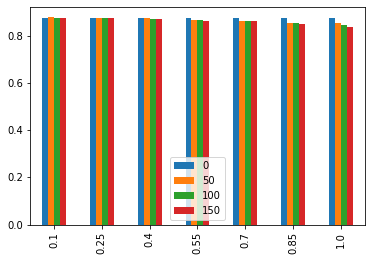

In [36]:
# para cada valor de alpha, mostramos el resultado de f1 al variar el ancho del intervalo.
df.plot.bar();

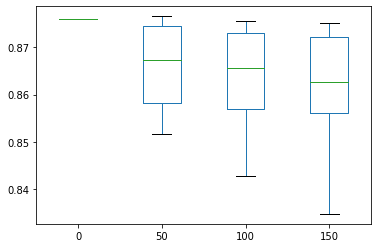

In [37]:
# para cada ancho de intervalo, mostramos la variabilidad de f1
df.plot.box()

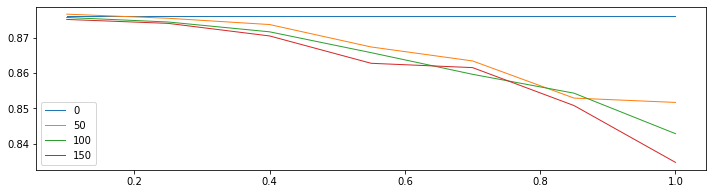

In [38]:
# valores de f1 para cada valor de alpha y cada ancho de intervalo
df.plot.line(figsize=(12,3),lw=1);

Se observa que al aumentar el ancho del intervalo donde se aplica el ruido disminuye el valor de f1 y también decrece al aumentar la amplitud del rudio. Como era de esperar si el ruido es más intenso y durante más tiempo, la precisión se reduce.